In [1]:
%matplotlib qt

In [17]:
import matplotlib as mpl
import happi
import numpy as np
import matplotlib.pyplot as plt

jetcmap = plt.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd
jet_vals = jetcmap(np.arange(9)) #extract those values as an array 
jet_vals[0] = [1.0, 1, 1.0, 1] #change the first value 
jet_vals[8] = [0.0, 0, 0.0, 1] #change the first value 
newcmap = mpl.colors.LinearSegmentedColormap.from_list("mine", jet_vals) 

from matplotlib import font_manager

font_dirs = ['/Users/yao/Documents/Calibri and Cambria Fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Calibri'

plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)
plt.rc('legend', fontsize=12)

In [18]:
wkdir = [
    '/Users/yao/Documents/Data/Vulcan2023/SS_12_v2000_r*/', # the one presented in the manuscript 21/07/2025
    '/Users/yao/Documents/Data/Vulcan2023/DS_12_v2000_r*/',
    # '/Users/yao/Documents/Data/Vulcan2023/v2500/SS_11_v2500_r*/',
    # '/Users/yao/Documents/Data/Vulcan2023/v2500/DS_11_v2500_r*/', # the one presented in the manuscript
    ]

In [19]:
S0 = happi.Open(wkdir[0], reference_angular_frequency_SI = 56375055300167.87)
S1 = happi.Open(wkdir[1], reference_angular_frequency_SI = 56375055300167.87)

Loaded simulation '/Users/yao/Documents/Data/Vulcan2023/SS_12_v2000_r0/'
Loaded simulation '/Users/yao/Documents/Data/Vulcan2023/SS_12_v2000_r1/'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Scanning for new particle diagnostics
Loaded simulation '/Users/yao/Documents/Data/Vulcan2023/DS_12_v2000_r0/'
Loaded simulation '/Users/yao/Documents/Data/Vulcan2023/DS_12_v2000_r1/'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Scanning for new particle diagnostics


In [20]:
# prepare constants, units

me = 9.1e-31
mp = 1836.*me
qe = 1.6e-19
ep = 8.9e-12  # epsilon_0
c  = 3.0e8
wr = S0.namelist.w_r
de = c / wr
Lx = S0.namelist.L_x.real * de * 1e3      # in mm
dx = S0.namelist.d_x * de * 1e3           # in mm

Te = S0.namelist.T_e * 511.e3             # in eV
ne = 1.0e18                              # in cm-3
ld = 7.43e2 * Te**0.5 * ne**(-0.5) * 10. # in mm
dt = S0.namelist.d_t

B0 = S0.namelist.B_z * (me * wr / qe)
wc = qe * B0 / me

# conversion constants for fields and momentum (when taken from TrackParticle)
kE = me*c*wr/qe  # V/m
kp = me*c        # kg m/s
kB = me*wr/qe    # T
conv_MeV_J = 10**6*qe

In [21]:
# energy spectra with errorbars

# averaged over 6 shots

data_directory = '/Users/yao/Nextcloud/PROJECTS/Vulcan/RAL_Shock_collide_August2023/'
data_file_double = 'double_spectra_combined_sigma2.txt'
data_file_single = 'single_spectra_combined.txt'

ene_exp_db = np.loadtxt(data_directory+data_file_double,usecols=0) # in keV
num_exp_db = np.loadtxt(data_directory+data_file_double,usecols=1) # in part/(MeV.sr)
err_exp_db = np.loadtxt(data_directory+data_file_double,usecols=2) # in keV

ene_exp_sg = np.loadtxt(data_directory+data_file_single,usecols=0) # in keV
num_exp_sg = np.loadtxt(data_directory+data_file_single,usecols=1) # in part/(MeV.sr)
err_exp_sg = np.loadtxt(data_directory+data_file_single,usecols=2) # in keV



In [35]:
import numpy as np

# load data (E_keV, dN/dE [protons/MeV/sr], sigma)
E_keV, dNdE_perMeV_per_sr, _ = np.loadtxt(data_directory+data_file_double,
                                          usecols=(0,1,2), unpack=True)

# E_keV, dNdE_perMeV_per_sr, _ = np.loadtxt(data_directory+data_file_single,
#                                           usecols=(0,1,2), unpack=True)


# convert dN/dE to per keV per sr
dNdE_perkeV_per_sr = dNdE_perMeV_per_sr / 1e3

# constants
keV_to_J   = 1.602176634e-16   # 1 keV  → Joule
e_charge   = 1.602176634e-19   # proton charge in Coulombs
Omega_sr   = 2.0 * np.pi       # solid angle (2π sr)

# integrals
W_keV_sr = np.trapz(E_keV * dNdE_perkeV_per_sr, E_keV)
W_J      = W_keV_sr * keV_to_J * Omega_sr

N_sr     = np.trapz(dNdE_perkeV_per_sr, E_keV)
N_total  = N_sr * Omega_sr
Q_C      = N_total * e_charge           # total charge in Coulombs

# output
print("Total energy [mJ] =", W_J*1e3)
print("Total protons    =", N_total)
print("Total charge [nC] =", Q_C*1e9)

Total energy [mJ] = 2.741371515271099
Total protons    = 180533051929.8674
Total charge [nC] = 28.924583746674212


In [36]:
import numpy as np

# load data (E_keV, dN/dE [protons/MeV/sr], sigma)
# E_keV, dNdE_perMeV_per_sr, _ = np.loadtxt(data_directory+data_file_double,
#                                           usecols=(0,1,2), unpack=True)

E_keV, dNdE_perMeV_per_sr, _ = np.loadtxt(data_directory+data_file_single,
                                          usecols=(0,1,2), unpack=True)


# convert dN/dE to per keV per sr
dNdE_perkeV_per_sr = dNdE_perMeV_per_sr / 1e3

# constants
keV_to_J   = 1.602176634e-16   # 1 keV  → Joule
e_charge   = 1.602176634e-19   # proton charge in Coulombs
Omega_sr   = 2.0 * np.pi       # solid angle (2π sr)

# integrals
W_keV_sr = np.trapz(E_keV * dNdE_perkeV_per_sr, E_keV)
W_J      = W_keV_sr * keV_to_J * Omega_sr

N_sr     = np.trapz(dNdE_perkeV_per_sr, E_keV)
N_total  = N_sr * Omega_sr
Q_C      = N_total * e_charge           # total charge in Coulombs

# output
print("Total energy [mJ] =", W_J*1e3)
print("Total protons    =", N_total)
print("Total charge [nC] =", Q_C*1e9)

Total energy [mJ] = 0.18518353612929783
Total protons    = 31656323392.71525
Total charge [nC] = 5.071902165815597


In [14]:
0.18 / 200. * 100

0.09

In [34]:
2.7 / 400. * 100

0.675

In [22]:
# add the simulation data onto the exp. spectra
# but here note that we need to be careful with the "time"

def spect_load_1d_iter(wkdir,iteration,species,xmin,xmax):
    """
    Inputs ----
    wkdir      : string, data directory
    iteration  : int,    number of timesteps used 
    species    : int,    which species you want to plot
                         according to your own diagnostic in the Namelist
    xmin, xmax : float,  spatial selections, NOTE: in unit of de
    
    Outputs ---
    ekin       : float,  x-axis, energy(E) in MeV
    num        : float,  y-axis, E \frac{dN}{dE} \frac{1}{N}
                                 N  is the total number of particles
                                 dN is the number of particles in each energy range (dE)
                                 dE is the energy range
    simu_time  : float,  simulation time
    """
    S = happi.Open(wkdir)                        # No need to open the data again.
    dt = S.namelist.d_t                            # get simulation timestep
    ts = S.ParticleBinning(species).getTimesteps() # get all the timesteps available for this diag.
    # iteration = int(ts[-2] * time)                 # choose the time you want by a factor of [0,1]*T_end
    simu_time = iteration * dt / wr                # convert it into real unit
    pb = S.ParticleBinning(species).get(iteration) # get the diag. data from the chosen timestep
    
    xx   = pb['x'] * de * 1e3                      # get position information and convert the unit to mm
    ekin = pb['ekin'] * 0.511                      # get energy information (E) and convert the unit to MeV -- the x-axis
    data = pb['data'][0]                           # get the particle number information
    data_selected = data[(xx>xmin) & (xx<xmax),:]  # select particle number according to position
                                                   # for our case now, this doesn't make much difference.
    
    data_ekin = np.sum(data_selected,axis=0)       # dN, ?? can't remember... you might want to check what it does
    dE = ekin[1]-ekin[0]                           # dE, energy range
    total_weight = np.sum(data)                    # N, total number of the selected portion
    num = data_ekin * ekin / total_weight / dE     # E \frac{dN}{dE} \frac{1}{N} -- the y-axis
    
    return ekin, num, simu_time

In [23]:
num = 140 
time_snap = S1.ParticleBinning(2).getTimesteps()[num]
time_ns = S1.ParticleBinning(2,units=['ns']).getTimes()[num]
print(time_ns)

ekin1, num1, t_end1 = spect_load_1d_iter(wkdir[1], time_snap, 2, 0.0, Lx)
ekin0, num0, t_end0 = spect_load_1d_iter(wkdir[0], time_snap, 2, 0.0, Lx)

4.138780862522813
Loaded simulation '/Users/yao/Documents/Data/Vulcan2023/DS_12_v2000_r0/'
Loaded simulation '/Users/yao/Documents/Data/Vulcan2023/DS_12_v2000_r1/'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Scanning for new particle diagnostics
Loaded simulation '/Users/yao/Documents/Data/Vulcan2023/SS_12_v2000_r0/'
Loaded simulation '/Users/yao/Documents/Data/Vulcan2023/SS_12_v2000_r1/'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Scanning for new particle diagnostics


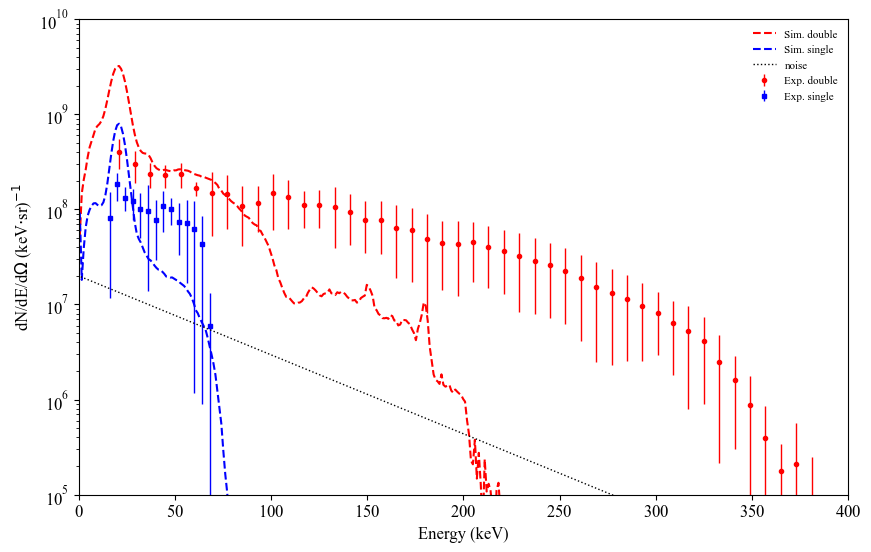

In [31]:
width  = 3.14 *3.5 # single column, 8cm
height = width / 1.618
fig, ax = plt.subplots()

plt.ticklabel_format(axis='both', style='sci',useMathText=True)

fig.subplots_adjust(left=.2, bottom=.2, right=.9, top=.9)

ax.set_yscale('log')

ax.errorbar(ene_exp_db[0:-1:8], num_exp_db[0:-1:8]/1e3, yerr=err_exp_db[0:-1:8]/1e3, 
            fmt='or',markersize=3,
            ecolor='r',elinewidth=1.0,
            # capsize=2.0, capthick = 1.0,
            label='Exp. double')

ax.errorbar(ene_exp_sg[0:-1:4], num_exp_sg[0:-1:4]/1e3, yerr=err_exp_sg[0:-1:4]/1e3, 
            fmt='sb',markersize=3,
            ecolor='b',elinewidth=1.0,
            # capsize=2.0, capthick = 1.0,
            label='Exp. single')

ax.plot(ekin1*1e3, num1*3e9, '--r',  label='Sim. double', lw=1.5)
ax.plot(ekin0*1e3, num0*7e8, '--b',  label='Sim. single', lw=1.5)

ax.tick_params(axis='both',which='major', direction='out',labelsize=12)
ax.minorticks_off()

ax.set_xlabel(r'Energy (keV)',fontsize=12)
ax.set_ylabel(r'dN/dE/d$\Omega$ (keV$\cdot$sr)$^{-1}$',fontsize=12)


ax.set_xlim([0, 400])
ax.set_ylim([1e5, 1e10])

energy_range = np.linspace(1,500)
noise_base = 10**(-0.0083*energy_range+10.3)
ax.semilogy(energy_range, noise_base/1e3, ':k', lw=1.0,label='noise')

leg = ax.legend(loc='best', numpoints=1, fancybox=False, fontsize=8, frameon=False)
leg._legend_box.align = "right"
fig.set_size_inches(width, height)
plt.show()

### note that here the simulation data used is 2500 km/s cases.
